# Enunciado:
  Faça uma análise do dataset antes de mais nada, verificando:
 -características gerais
 -se tem campos nulos

Uma vez feito isso, faça para o dataset:

### Utilizando o dataset faça:
1.1 - Carregue a base de dados e separe os dados e as classes em variáveis distintas. A feature 'deposit_cat' armazena a classe/target/label/rótulo.
1.2 - Treine o modelo baseado em arvore de decisão com seus parâmetros padrões.
1.3 - Computar a acurária dos dados de treino e de teste
1.4 - Qual a feature mais importante? Justifique sua resposta.
1.5 - Utilizando o código abaixo (Visualizando de forma gráfica a arvore gerada), faça as alterações necessárias para renderizar de forma gráfica a arvore utilizando o modelo treinado no item anterior (1.2).

1.6 - Observou que a arvore ficou muito grande ? Explique como é possível reduzir o tamanho da árvore. Quais os parâmetros que influenciam diretamente na profundidade da arvore?
1.7 - Baseado nisso, treine novamente o modelo, dessa vez, aumentando o parâmetro max_depth e renderize novamente a arvore de forma gráfica.
2) Baseado no conhecimento aprendido sobre o parâmetro min_samples_split e seu impacto na complexidade do modelo, utilize a função abaixo e plote as fronteiras para os valores de min_samples_split iguais a 2, 5 e 15, com a produndidade None(Maxima). Depois teste com três valores diferentes de profundidade.
Utilize o modelo treinado anteriormente.
Faça os ajustes necessários na função abaixo, como alteração dos valores das váriáveis X e y.
Não esqueça de importar a biblioteca ml_extend conforme aprendemos em 

3.1 - Carregue a base de dados.
3.2 - Divida os dados em em treino e teste com o percentual de 30% para teste e 70% para treino, com random_state=1.
3.3 - Utilize a função compara_modelos() conforme o código abaixo, bem como os prints para a chamda desta função com diferentes valores de profundidade.
3.4 - Faça as alterações necessárias para utilizar os dados divididos anteriormente.
3.5 - Qual profundidade tem o melhor desempenho? Justifique apresentando os valores de training socre e testing score.aula.


In [1]:
#importanto as bibliotecas
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import graphviz

In [4]:
#Importando Dataset

data = pd.read_csv('Dataset/dataset.csv')
data.head()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,recent_pdays,deposit_cat,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,59,2343,1042,1,0,0,1,0,0.0001,1,...,0,1,0,0,1,0,0,0,0,1
1,56,45,1467,1,0,0,0,0,0.0001,1,...,0,1,0,0,1,0,0,0,0,1
2,41,1270,1389,1,0,0,1,0,0.0001,1,...,0,1,0,0,1,0,0,0,0,1
3,55,2476,579,1,0,0,1,0,0.0001,1,...,0,1,0,0,1,0,0,0,0,1
4,54,184,673,2,0,0,0,0,0.0001,1,...,0,1,0,0,0,1,0,0,0,1


## Verificando caracteristicas gerais do dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  11162 non-null  int64  
 1   balance              11162 non-null  int64  
 2   duration             11162 non-null  int64  
 3   campaign             11162 non-null  int64  
 4   previous             11162 non-null  int64  
 5   default_cat          11162 non-null  int64  
 6   housing_cat          11162 non-null  int64  
 7   loan_cat             11162 non-null  int64  
 8   recent_pdays         11162 non-null  float64
 9   deposit_cat          11162 non-null  int64  
 10  job_blue-collar      11162 non-null  int64  
 11  job_entrepreneur     11162 non-null  int64  
 12  job_other            11162 non-null  int64  
 13  job_pink-collar      11162 non-null  int64  
 14  job_self-employed    11162 non-null  int64  
 15  job_technician       11162 non-null 

In [6]:
data.describe()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,recent_pdays,deposit_cat,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,...,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,371.993818,2.508421,0.832557,0.015051,0.473123,0.130801,0.003124,0.473840,...,0.115839,0.568984,0.315176,0.134385,0.490593,0.330496,0.044526,0.110016,0.095951,0.794033
std,11.913369,3225.413326,347.128386,2.722077,2.292007,0.121761,0.499299,0.337198,0.030686,0.499338,...,0.320047,0.495241,0.464607,0.341080,0.499934,0.470413,0.206270,0.312924,0.294537,0.404424
min,18.000000,-6847.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,122.000000,138.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,550.000000,255.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,49.000000,1708.000000,496.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.001919,1.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,63.000000,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#Verificando dados nulos
data.isna().sum()

age                    0
balance                0
duration               0
campaign               0
previous               0
default_cat            0
housing_cat            0
loan_cat               0
recent_pdays           0
deposit_cat            0
job_blue-collar        0
job_entrepreneur       0
job_other              0
job_pink-collar        0
job_self-employed      0
job_technician         0
job_white-collar       0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
poutcome_failure       0
poutcome_success       0
poutcome_unknown       0
dtype: int64

In [8]:
# Separando os dados em recursos (X) e classe (y)
X = data.drop(columns=['deposit_cat'])  # Remova a coluna 'deposit_cat' se for o rótulo
y = data['deposit_cat']


In [9]:
# Dividindo o conjunto de dados em treinamento e teste (70% treinamento, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [10]:
# Treinando o modelo de Árvore de Decisão com parâmetros padrões
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
# Computando a acurácia dos dados de treino e teste
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)
print("\nAcurácia no conjunto de treinamento:", train_accuracy)
print("Acurácia no conjunto de teste:", test_accuracy)



Acurácia no conjunto de treinamento: 1.0
Acurácia no conjunto de teste: 0.7333532397730665


### Para o modelo com profundidade máxima (None), a acurácia no conjunto de treinamento é de 100%, o que pode indicar um possível overfitting, já que o modelo se ajustou perfeitamente aos dados de treinamento, mas sua acurácia no conjunto de teste é de cerca de 73.34%, o que é uma performance razoável. Além disso, observou-se que o tamanho da árvore ficou muito grande, o que é um indicativo de complexidade excessiva. Para contornar o mencionado problema, iremos limitar a profundidade máxima da árvore de decisão (max_depth).

In [12]:
# Encontrando a feature mais importante
feature_importance = clf.feature_importances_
most_important_feature = X.columns[feature_importance.argmax()]
print("\nFeature mais importante:", most_important_feature)


Feature mais importante: duration


### A feature "duration" é a mais importante na análise da árvore de decisão, pois indica o tempo de interação com o cliente, um indicador crítico de engajamento. Ela contribui significativamente para a separação dos dados, mantendo sua importância em diferentes profundidades da árvore. Portanto, "duration" desempenha um papel fundamental na previsão de resultados.

In [25]:
# Visualizando a árvore de decisão
dot_data = tree.export_graphviz(
    clf,  # Modelo treinado
    out_file=None,
    feature_names=X.columns,  # Nomes das features
    class_names=['0', '1'],  # Nomes das classes/target
    filled=True,
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render("arvore_de_decisao")



'arvore_de_decisao.pdf'

In [15]:
# Reduzindo o tamanho da árvore ajustando max_depth
clf_depth = DecisionTreeClassifier(max_depth=5)
clf_depth.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5)

In [26]:
# Visualizando a árvore de decisão com profundidade limitada
dot_data_depth = export_graphviz(clf_depth, out_file=None, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True, special_characters=True)
graph_depth = graphviz.Source(dot_data_depth)
graph_depth.render("arvore_de_decisao_depth")


'arvore_de_decisao_depth.pdf'

In [17]:
# Visualizando as fronteiras de decisão
def visualize_fronteiras(min_samples_split, max_depth):
    clf_split = DecisionTreeClassifier(min_samples_split=min_samples_split, max_depth=max_depth)
    clf_split.fit(X.values[:, [0, 2]], y)
    plt.figure(figsize=(8, 5))
    plot_decision_regions(X.values[:, [0, 2]], y.values, clf=clf_split, legend=2)
    plt.xlabel('Eixo X')
    plt.ylabel('Eixo Y')
    plt.title(f'Decision Tree (min_samples_split={min_samples_split}, max_depth={max_depth})')
    plt.show()

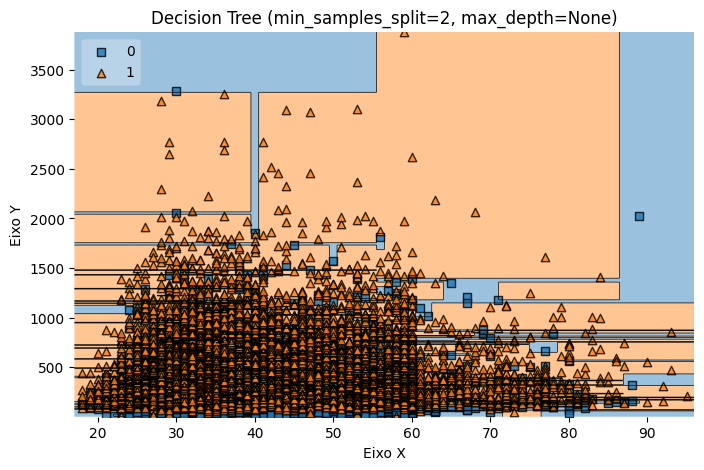

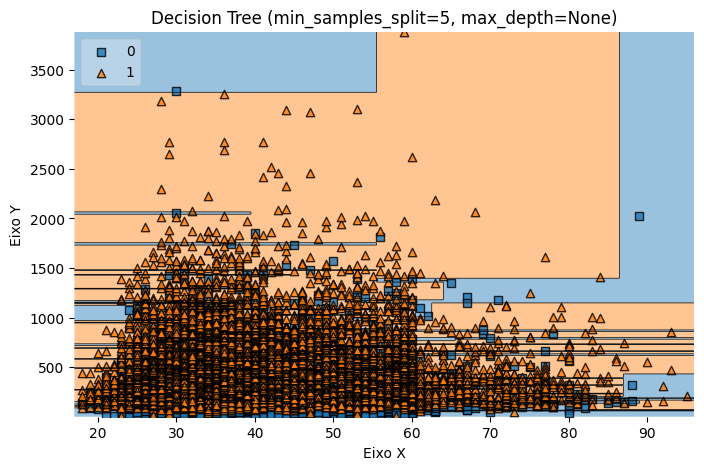

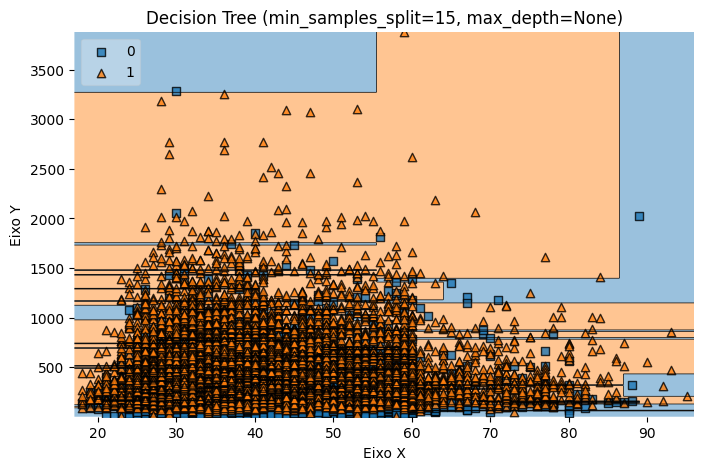

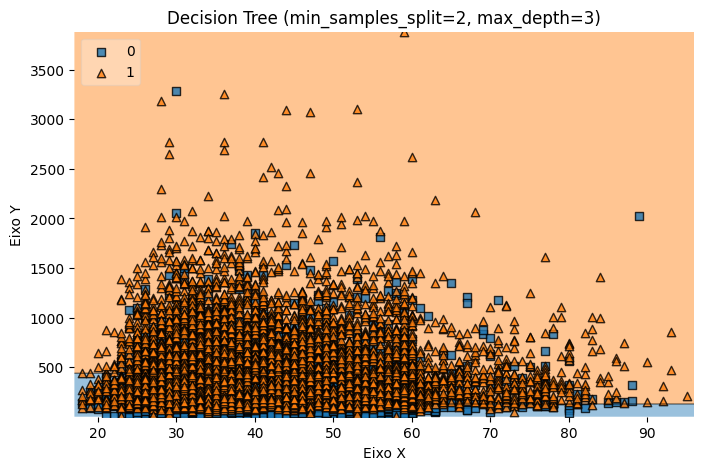

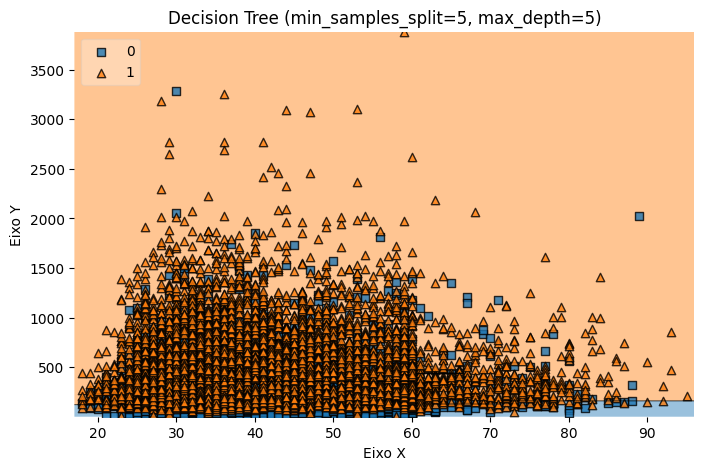

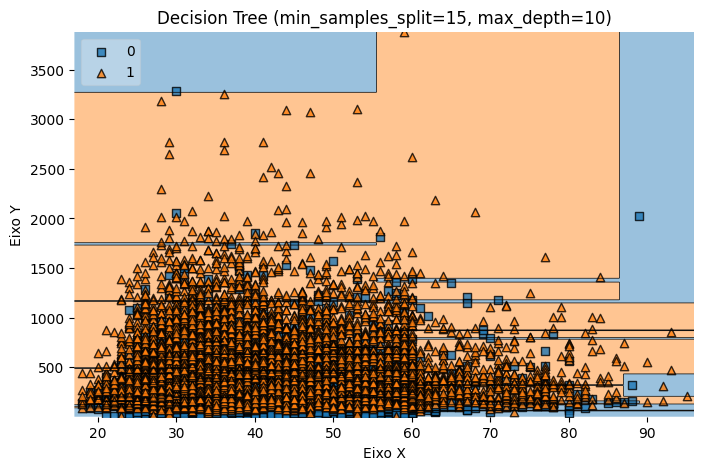

In [18]:
visualize_fronteiras(2, None)
visualize_fronteiras(5, None)
visualize_fronteiras(15, None)
visualize_fronteiras(2, 3)
visualize_fronteiras(5, 5)
visualize_fronteiras(15, 10)


In [19]:
# Comparando modelos com diferentes profundidades
def compara_modelos(maxdepth):
    if maxdepth == 0:
        dt = DecisionTreeClassifier(random_state=1)
    else:
        dt = DecisionTreeClassifier(random_state=1, max_depth=maxdepth)
    dt.fit(X_train, y_train)
    train_score = dt.score(X_train, y_train)
    test_score = dt.score(X_test, y_test)
    return train_score, test_score


In [20]:
profundidades = [None, 5, 10, 15]
for profundidade in profundidades:
    train_score, test_score = compara_modelos(profundidade)
    print(f"\nProfundidade {profundidade}: Acurácia no treinamento: {train_score}, Acurácia no teste: {test_score}")



Profundidade None: Acurácia no treinamento: 1.0, Acurácia no teste: 0.7324574499850701

Profundidade 5: Acurácia no treinamento: 0.7915013439139895, Acurácia no teste: 0.7766497461928934

Profundidade 10: Acurácia no treinamento: 0.8671445027518239, Acurácia no teste: 0.7811286951328755

Profundidade 15: Acurácia no treinamento: 0.9463714322283374, Acurácia no teste: 0.749776052553001


## Considerações finais:
### Os resultados das métricas de acurácia para diferentes profundidades da árvore de decisão revelam informações importantes. Inicialmente, observamos que o modelo com profundidade máxima (None) apresenta uma acurácia perfeita no conjunto de treinamento, indicando um possível overfitting, já que sua acurácia no conjunto de teste é apenas razoável, em torno de 73.34%.

### Ao limitar a profundidade da árvore para 5, vemos uma redução na diferença entre as acurácias de treinamento e teste, sugerindo uma diminuição no overfitting, com acurácias de treinamento e teste em torno de 79.15% e 77.66%, respectivamente.

### Aumentando a profundidade para 10, a diferença entre as acurácias continua diminuindo, com valores de aproximadamente 86.71% no treinamento e 78.11% no teste, indicando um equilíbrio favorável.

### No entanto, com profundidade máxima de 15, vemos um aumento na diferença entre as acurácias, o que sugere superajustamento aos dados de treinamento, com acurácias de treinamento e teste em torno de 94.64% e 74.98%, respectivamente.

### Resumidamente, o modelo com profundidade 10 demonstra ser uma escolha sólida, oferecendo um bom equilíbrio entre acurácia de treinamento e teste.